### Armijo Rule with BackTracking

Optimal solution: [1. 2.]
Objective function value at optimal point: 0.0


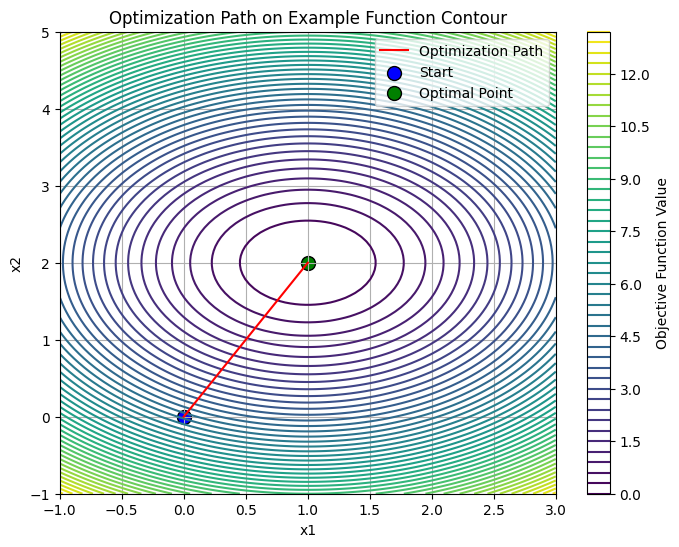

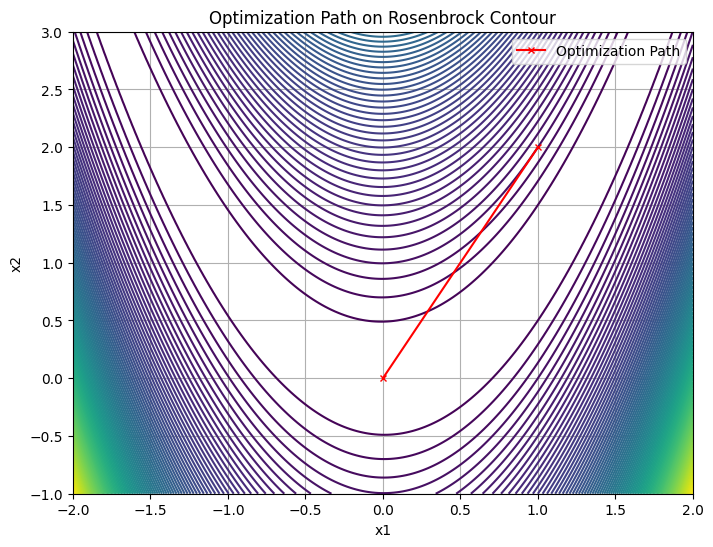

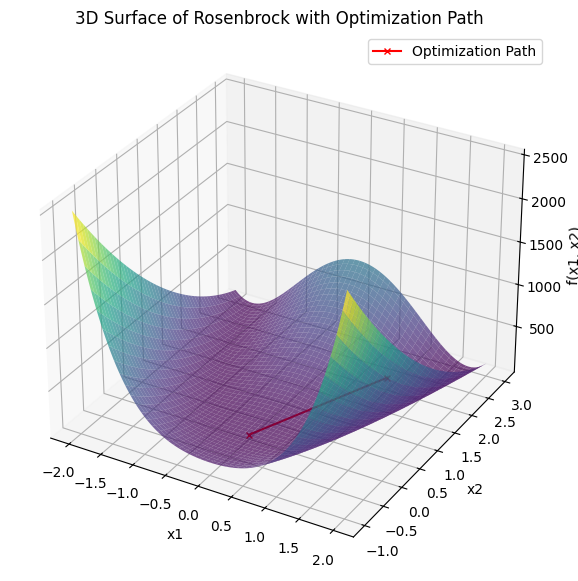

In [1]:

"""

The Armijo condition is an essential criterion for determining step sizes in optimization algorithms. It ensures that the step taken in the gradient descent leads to sufficient improvement in the function value. This helps prevent overstepping or understepping during optimization.

### Armijo Condition:
Given a point \( x \) and its gradient \( \nabla f(x) \), the step size \( \alpha \) should satisfy:
f(x) - f(x - α ∇f(x)) ≥ c1 * α * ||∇f(x)||²
where \( c1 \) is a small constant, typically between 0 and 1.

### Armijo Backtracking:
Backtracking adjusts the step size \( \alpha \) iteratively by reducing it using a factor \( \beta \) (where \( 0 < \beta < 1 \)) until the Armijo condition is satisfied.

### Optimization Algorithm:
1. Start with an initial guess for the point \( x^{(0)} \) and set the maximum iteration count.
2. Compute the gradient \( \nabla f(x) \) at the current location.
3. Check for convergence by evaluating the gradient's magnitude. If the gradient is small enough, stop the optimization.
4. Use an initial guess for the step size \( \alpha \).
5. While the Armijo condition is not satisfied, reduce the step size by multiplying it by \( \beta \).
6. Update the current point \( x \) using the step size and the gradient.
7. Record the new point for visualization.
8. Continue until convergence or maximum iterations are reached.
9. Return the final optimized point and the path of the optimization.

"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ArmijoGradientDescent:
    def __init__(self, func, grad_func, c1=0.1, beta=0.5, epsilon=1e-5, max_iter=1000):
        self.func = func
        self.grad_func = grad_func
        self.c1 = c1
        self.beta = beta
        self.epsilon = epsilon
        self.max_iter = max_iter

    def optimize(self, start_point):
        x = start_point
        iteration = 0
        path = [x.copy()]  # Track the optimization path

        while iteration < self.max_iter:
            grad = self.grad_func(x)

            # Check for convergence
            if np.linalg.norm(grad) < self.epsilon:
                break

            step_size = 1.0  # Initial guess for step size

            # Backtracking to satisfy Armijo condition
            while (self.func(x) - self.func(x - step_size * grad)
                   < self.c1 * step_size * np.dot(grad, grad)):
                step_size *= self.beta

            # Update the point based on the step size
            x = x - step_size * grad
            path.append(x.copy())
            iteration += 1

        return x, path

# Example function and its gradient to minimize
def example_function(x):
    return (x[0] - 1) ** 2 + (x[1] - 2) ** 2

def example_gradient(x):
    return np.array([2 * (x[0] - 1), 2 * (x[1] - 2)])

def rosenbrock_function(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

def plot_example_function_contour(path):
    x_range = np.linspace(-1, 3, 100)
    y_range = np.linspace(-1, 5, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = example_function(np.array([X, Y]))

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Objective Function Value')
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], 'r-', label='Optimization Path')
    plt.scatter(path[0, 0], path[0, 1], color='blue', label='Start', s=100, edgecolor='black')
    plt.scatter(path[-1, 0], path[-1, 1], color='green', label='Optimal Point', s=100, edgecolor='black')

    plt.title('Optimization Path on Example Function Contour')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_rosenbrock_contour_with_path(path):
    x_vals = np.linspace(-2, 2, 200)
    y_vals = np.linspace(-1, 3, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock_function(np.array([X, Y]))

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=100, cmap='viridis')
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], color='red', marker='x', markersize=5, linestyle='-', label="Optimization Path")
    plt.title("Optimization Path on Rosenbrock Contour")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_rosenbrock_3d_with_path(path):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    x_vals = np.linspace(-2, 2, 200)
    y_vals = np.linspace(-1, 3, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock_function(np.array([X, Y]))

    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')
    path = np.array(path)
    path_z = np.array([rosenbrock_function(p) for p in path])
    ax.plot(path[:, 0], path[:, 1], path_z, color='red', marker='x', markersize=5, linestyle='-', label="Optimization Path")

    ax.set_title("3D Surface of Rosenbrock with Optimization Path")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("f(x1, x2)")
    ax.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    initial_point = np.array([0.0, 0.0])
    optimizer = ArmijoGradientDescent(example_function, example_gradient)
    optimal_point, optimization_path = optimizer.optimize(initial_point)
    print(f"Optimal solution: {optimal_point}")
    print(f"Objective function value at optimal point: {example_function(optimal_point)}")

    # Plot all three visualizations
    plot_example_function_contour(optimization_path)
    plot_rosenbrock_contour_with_path(optimization_path)
    plot_rosenbrock_3d_with_path(optimization_path)
